### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
#from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
#roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [2]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset


In [3]:
data = pd.read_csv('bank-full.csv', delimiter = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exploratory Data Analysis

#### A Binary Classification Task as we have classes to predict whether it is 'Yes' or 'No' in a Binomial Distribution

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.shape

(45211, 17)

### Descriptive Statistics

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.describe(include =['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### Checking Data type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### All the columns data types are correctly identified

### Checking for Null Values

In [9]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking for Duplicate Values

In [10]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


### Lets make an visualization about are target column

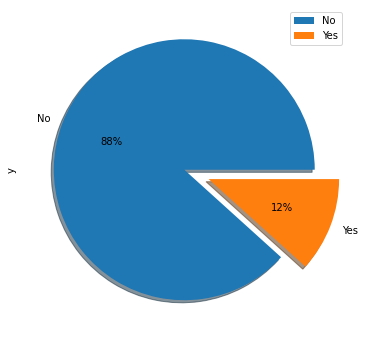

In [11]:
plt.figure(figsize = (9,6))
labels = ['No','Yes']
data['y'].value_counts().plot.pie(shadow = True,labels = labels, autopct = '%0.f%%',explode = [0.0,0.2])
plt.legend()
plt.show()

### Visualize the dataset

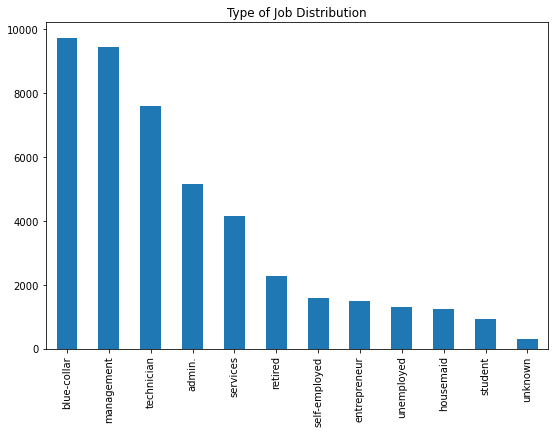

In [12]:
plt.figure(figsize =(9,6))
data['job'].value_counts().plot(kind ='bar')
plt.title("Type of Job Distribution")
plt.show()

#### Plot default column
Column default says that client has credit in default or not. It has categorical value: ‘no’,’yes’,’unknown’.

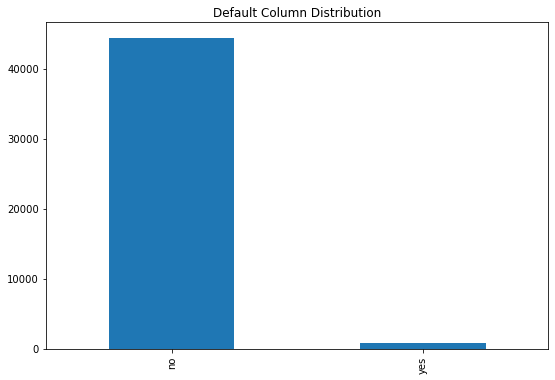

In [13]:
plt.figure(figsize =(9,6))
data['default'].value_counts().plot(kind ='bar')
plt.title("Default Column Distribution")
plt.show()

#### Plot marital status
marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)

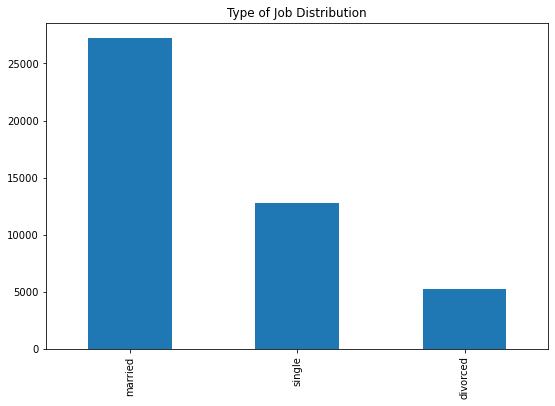

In [14]:
plt.figure(figsize =(9,6))
data['marital'].value_counts().plot(kind ='bar')
plt.title("Type of Job Distribution")
plt.show()

#### Plot customer has personal loan or not

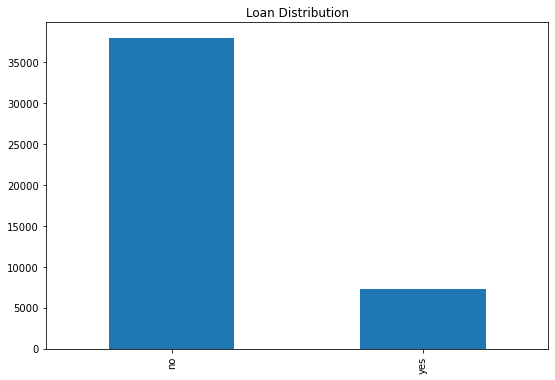

In [15]:
plt.figure(figsize =(9,6))
data['loan'].value_counts().plot(kind ='bar')
plt.title("Loan Distribution")
plt.show()

#### As per data, some client has taken the personal loan.

#### Plot client has housing loan or not

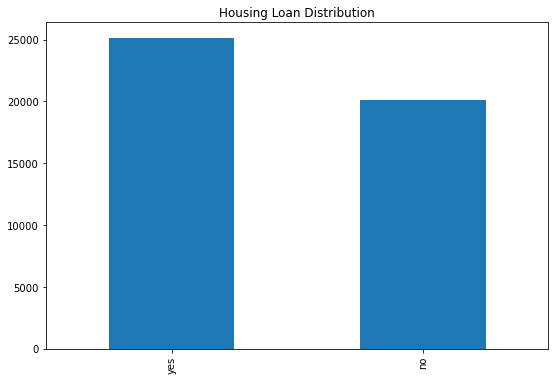

In [16]:
plt.figure(figsize =(9,6))
data['housing'].value_counts().plot(kind ='bar')
plt.title("Housing Loan Distribution")
plt.show()

#### Most of the client has taken the housing loan.

### Plot education column

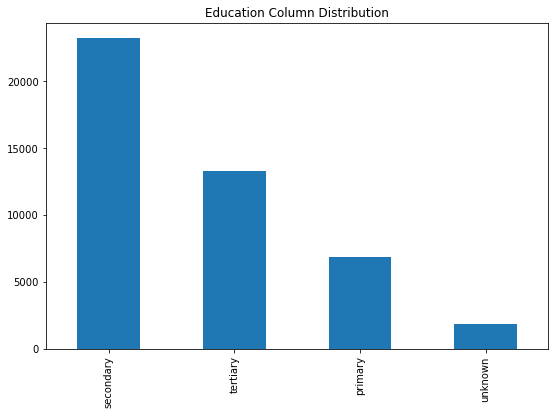

In [17]:
plt.figure(figsize =(9,6))
data['education'].value_counts().plot(kind ='bar')
plt.title("Education Column Distribution")
plt.show()

#### Plot contact column
Contact column says client were contacted by cellular or telephone.

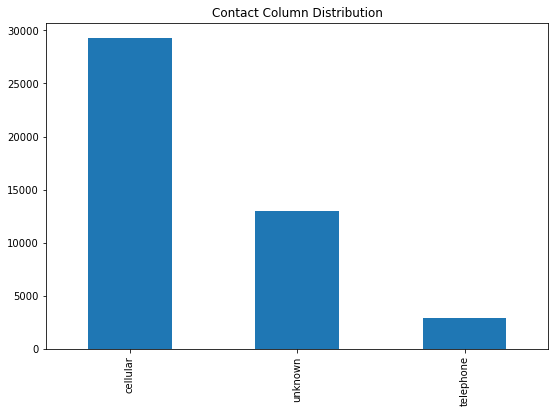

In [18]:
plt.figure(figsize =(9,6))
data['contact'].value_counts().plot(kind ='bar')
plt.title("Contact Column Distribution")
plt.show()

### Plot month column
month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

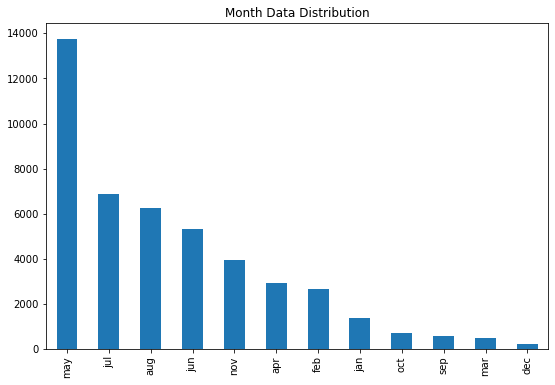

In [19]:
plt.figure(figsize =(9,6))
data['month'].value_counts().plot(kind ='bar')
plt.title("Month Data Distribution")
plt.show()

#### Plot pdays column
‘pdays’ column into a binary variable indicating whether they were contacted or not.

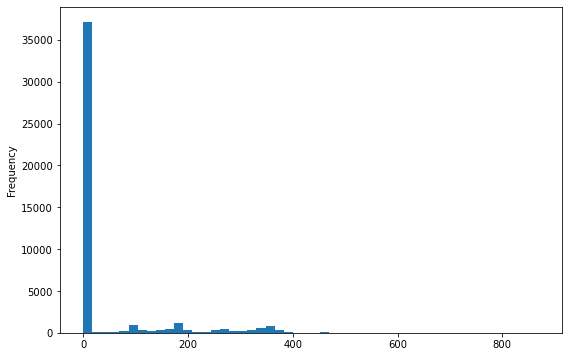

In [20]:
plt.figure(figsize =(9,6))
data['pdays'].plot(kind ='hist', bins = 50)
plt.show()

### Plot pdays whose value is greater than 0

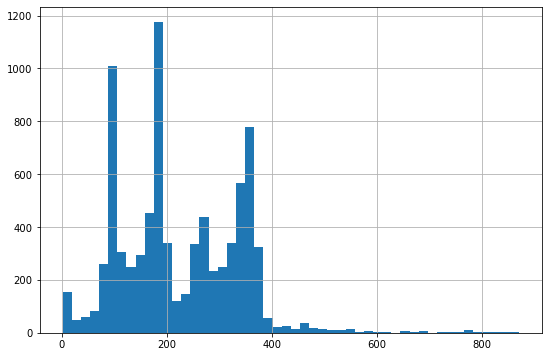

In [21]:
plt.figure(figsize = (9, 6))
data[data['pdays'] > 0]['pdays'].hist(bins=50)
plt.show()

#### Plot client has subscribed a term deposit

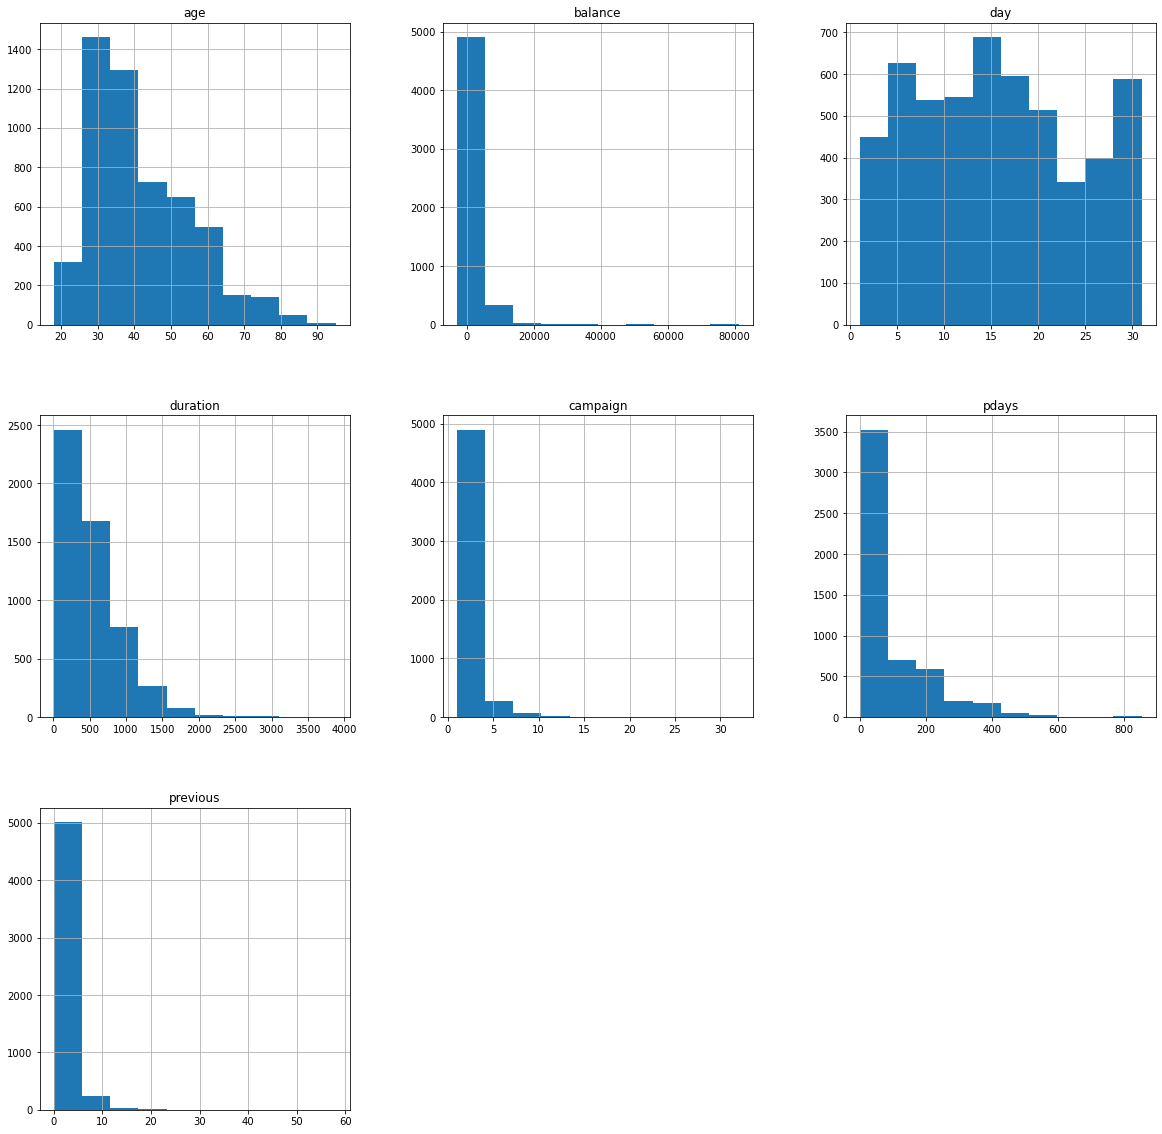

In [22]:
data[data['y'] == 'yes'].hist(figsize = (20,20))
plt.title('Client has subscribed a term deposite')
plt.show()

#### Plot client has not subscribed a term deposit

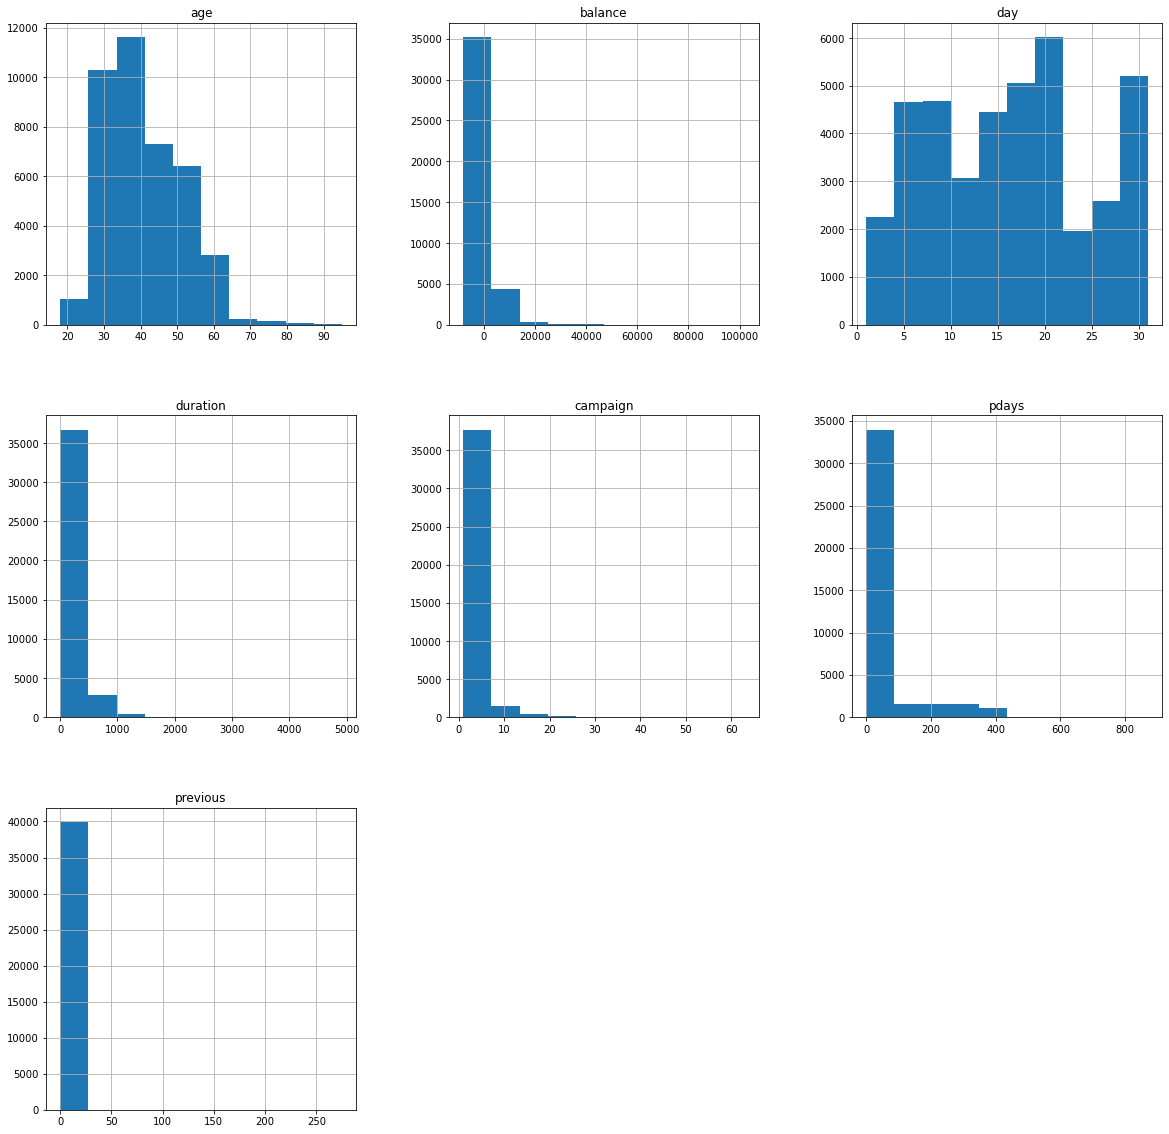

In [23]:
data[data['y'] == 'no'].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposite')
plt.show()

### Data Preprocessing

In [24]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### We can see there are some binary columns(default, housing, loan) which are object type, we need to convert into numeric value.

#### There are categorical columns also, but there are a limited number of choices. They are job, marital, education, contact, month, and poutcome. That also need to converted into numerical format.

#### All feature columns we need to convert into numeric values then only we can feed into the model.

### Convert default column into numeric value
#### We can convert the yes values to 1, and the no values to 0 for default column. We will lamda function for tis

In [25]:
data['is_default'] = data['default'].apply(lambda row: 1 if row == 'yes' else 0)

#### View default and is_default columns together

In [26]:
data[['default','is_default']].head(10)

,default,is_default
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,yes,1
8,no,0
9,no,0


#### Convert housing column into numeric value
For housing column also we will do the same.

In [27]:
data['is_housing'] = data['housing'].apply(lambda row: 1 if row == 'yes' else 0)
data[['housing','is_housing']].head(10)

,housing,is_housing
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0
5,yes,1
6,yes,1
7,yes,1
8,yes,1
9,yes,1


#### Convert loan column into numeric value

In [28]:
data['is_loan'] = data['loan'].apply(lambda row: 1 if row == 'yes' else 0)
data[['loan', 'is_loan']].head(10)

,loan,is_loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0
5,no,0
6,yes,1
7,no,0
8,no,0
9,no,0


#### Convert target column ‘y’ into numeric value

In [29]:
data['target'] = data['y'].apply(lambda row: 1 if row == 'yes' else 0)
data[['y', 'target']].head(10)

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,no,0
8,no,0
9,no,0


### Creating one-hot encoding for non-numeric marital column
#### For marital column, we have three values married, single and divorced. We will use pandas’ get_dummies function to convert categorical variable into dummy/indicator variables.

In [30]:
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
marital_dummies.tail()

,marital_divorced,marital_married,marital_single
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0
45210,0,1,0


#### Merge marital_dummies with marital column

In [31]:
pd.concat([data['marital'], marital_dummies], axis=1).head(10)

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1
5,married,0,1,0
6,single,0,0,1
7,divorced,1,0,0
8,married,0,1,0
9,single,0,0,1


#### We can see in each of the rows there is one value of 1, which is in the column corresponding the value in the marital column.

#### There are three values, if two of the values in the dummy columns are 0 for a particular row, then the remaining column must be equal to 1. It is important to eliminate any redundancy and correlations in features as it becomes difficult to determine which feature is most important in minimizing the total error.

#### So let us remove one column divorced.

### Remove marital_divorced column

In [32]:
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


#### Merge marital_dummies into main dataframe

In [33]:
data = pd.concat([data, marital_dummies], axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,is_default,is_housing,is_loan,target,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,0,1,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,0,1,1,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,0,1,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,0,0,0,0,0,1


### Creating one hot encoding for job column

In [34]:
job_dummies = pd.get_dummies(data['job'], prefix = 'job')
job_dummies.tail()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0
45210,0,0,1,0,0,0,0,0,0,0,0,0


#### Dropping unknown column in job 

In [35]:
job_dummies.drop('job_unknown', axis=1, inplace=True)
job_dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0
45207,0,0,0,0,0,1,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0


#### Merging job_dummies into Main dataframe

In [36]:
data = pd.concat([data, job_dummies], axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


### Creating one hot encoding for education column

In [37]:
education_dummies = pd.get_dummies(data['education'], prefix = 'education')
education_dummies.tail()

,education_primary,education_secondary,education_tertiary,education_unknown
45206,0,0,1,0
45207,1,0,0,0
45208,0,1,0,0
45209,0,1,0,0
45210,0,1,0,0


In [38]:
education_dummies.drop('education_unknown', axis=1, inplace=True)
education_dummies.tail()

,education_primary,education_secondary,education_tertiary
45206,0,0,1
45207,1,0,0
45208,0,1,0
45209,0,1,0
45210,0,1,0


In [39]:
data = pd.concat([data, education_dummies], axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,1,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


### Creating one hot encoding for contact column

In [40]:
contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact')
contact_dummies.tail()

,contact_cellular,contact_telephone,contact_unknown
45206,1,0,0
45207,1,0,0
45208,1,0,0
45209,0,1,0
45210,1,0,0


In [41]:
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
contact_dummies.tail()

,contact_cellular,contact_telephone
45206,1,0
45207,1,0
45208,1,0
45209,0,1
45210,1,0


In [42]:
data = pd.concat([data, contact_dummies], axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,1,0,0,1,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,1,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


### Creating one hot encoding for poutcome column

In [43]:
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
poutcome_dummies.tail()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,1,0
45209,0,0,0,1
45210,0,1,0,0


In [44]:
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
poutcome_dummies.tail()

,poutcome_failure,poutcome_other,poutcome_success
45206,0,0,0
45207,0,0,0
45208,0,0,1
45209,0,0,0
45210,0,1,0


In [45]:
data = pd.concat([data, poutcome_dummies], axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,1,0,0,0,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,1,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


### Convert month column into numeric value

In [46]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
data['month'] = data['month'].map(months)
data['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

#### pdays column
#### ‘pdays’ column indicates the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). If the value of ‘pdays’ is ‘-1’, if so we will associate that with a value of 0,

In [47]:
data[data['pdays'] == -1]['pdays'].count()

36954

In [48]:
data['was_contacted'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)
data[['pdays','was_contacted']].tail()

,pdays,was_contacted
45206,-1,0
45207,-1,0
45208,184,1
45209,-1,0
45210,188,1


### Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns

In [49]:
data.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'pdays', 'poutcome', 'y'], axis=1, inplace=True)
data.head()

,age,balance,day,month,duration,campaign,previous,is_default,is_housing,is_loan,...,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,was_contacted
0,58,2143,5,5,261,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,44,29,5,5,151,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,33,2,5,5,76,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,47,1506,5,5,92,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,1,5,5,198,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking the data types of the columns

In [50]:
data.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
previous               int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
was_contacted          int64
dtype: object

### Convert into X(features) and y(target)

In [51]:
X = data.drop('target', axis=1)
y = data['target']

### Shape of X and y

In [52]:
X.shape

(45211, 32)

In [53]:
y.shape

(45211,)

### Divide features and target into train and test data

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

### View the shape of X_train, X_test, y_train, y_test

In [55]:
print('X train:',X_train.shape,'\n','X test:',X_test.shape,'\n','y train:',y_train.shape,'\n','y shape:',y_test.shape)

X train: (36168, 32) 
 X test: (9043, 32) 
 y train: (36168,) 
 y shape: (9043,)


### Create a LogisticRegression model

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Train the model

In [57]:
model.fit(X_train, y_train)

LogisticRegression()

### Predict test data

In [58]:
y_pred = model.predict(X_test)

### Predicted and actual value

In [59]:
print("Predicted value: ", y_pred[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  16710    0
37245    0
24255    0
18849    0
7402     0
28326    0
27609    0
44971    0
23297    0
11045    0
Name: target, dtype: int64


### View accuracy of the model

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred = y_pred, y_true = y_test)
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

Accuracy of the model Logistic Regression is 89.14%


### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfcpredictions = rfc.predict(X_test)
print("Predicted value: ", rfcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  16710    0
37245    0
24255    0
18849    0
7402     0
28326    0
27609    0
44971    0
23297    0
11045    0
Name: target, dtype: int64


In [62]:
accuracy = accuracy_score(y_pred = rfcpredictions, y_true = y_test)
print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 90.31%


### SVC (support Vector Classifier)

In [67]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svcpredictions = svc.predict(X_test)
print("Predicted value: ", svcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  16710    0
37245    0
24255    0
18849    0
7402     0
28326    0
27609    0
44971    0
23297    0
11045    0
Name: target, dtype: int64


In [68]:
accuracy = accuracy_score(y_pred = svcpredictions, y_true = y_test)
print(f'Accuracy of the SVC model is {accuracy*100:.2f}%')

Accuracy of the SVC model is 88.61%


### Decision Tree Classifier


In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtcprediction = dtc.predict(X_test)
print("Predicted value: ", dtcprediction[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  16710    0
37245    0
24255    0
18849    0
7402     0
28326    0
27609    0
44971    0
23297    0
11045    0
Name: target, dtype: int64


In [70]:
accuracy = accuracy_score(y_pred = dtcprediction, y_true = y_test)
print(f'Accuracy of the Decision Tree Classifier model is {accuracy*100:.2f}%')

Accuracy of the Decision Tree Classifier model is 87.24%


### We can see Random Forest Classifier model gives us highest accuracy 91.71%.